**Feature Scaling**:Technique in which values are shifted and rescaled so that they end up ranging between 0 and 1

**Why**: Range/magnitude/units of all features in the data should be normalized so that 
each feature contributes approximately proportionately to the final distance.
Having features on a similar scale can help the gradient descent converge more quickly towards the minima


Distance based algorithms like KNN, K-means, and SVM are most affected by the range of features. 
This is because behind the scenes they are using distances between data points to determine their similarity.
Tree-Based Algorithms on the other hand, are fairly insensitive to the scale of the features

Most commanaly used feature scaling techniques are:
1. Normalization/Min-Max Scalar
2. Standardazation/ Standard scalar

What is Normalization?
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

Here’s the formula for normalization:

Normalization equation:

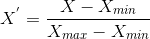

Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.




What is Standardization?
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

Here’s the formula for standardization: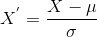

Note that in this case, the values are not restricted to a particular range.

Normalize or Standardize?

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data. You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

 

In [1]:
#Implementation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
data= pd.read_csv("income.csv")

In [3]:
data.shape

(31978, 13)

In [4]:
data.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        31978 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     31978 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [13]:
# filter the numeric variables from the data
data_num = data.select_dtypes(include = np.number)
data_num

,age,capitalgain,capitalloss,hoursperweek
0,45,0,0,28
1,24,0,0,40
2,44,0,0,40
3,27,0,0,40
4,20,0,0,35
...,...,...,...,...
31973,34,594,0,60
31974,34,0,0,40
31975,23,0,0,40
31976,42,0,0,40


In [9]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(data_num)

# transform training data
data_num_norm = norm.transform(data_num)



In [11]:
data_num_norm

array([[0.38356164, 0.        , 0.        , 0.2755102 ],
       [0.09589041, 0.        , 0.        , 0.39795918],
       [0.36986301, 0.        , 0.        , 0.39795918],
       ...,
       [0.08219178, 0.        , 0.        , 0.39795918],
       [0.34246575, 0.        , 0.        , 0.39795918],
       [0.16438356, 0.        , 0.        , 0.39795918]])

In [16]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# fit on data column
scale = StandardScaler().fit(data_num)
    
# transform the data column
data_num_scale = scale.transform(data_num)

data_num_scale


array([[ 0.4699925 , -0.14583315, -0.21599088, -1.00589366],
       [-1.06713224, -0.14583315, -0.21599088, -0.03384744],
       [ 0.39679608, -0.14583315, -0.21599088, -0.03384744],
       ...,
       [-1.14032866, -0.14583315, -0.21599088, -0.03384744],
       [ 0.25040325, -0.14583315, -0.21599088, -0.03384744],
       [-0.70115016, -0.14583315, -0.21599088, -0.03384744]])

In [ ]:
# Assignment 
#Compare unscaled, normalized and standardized data using visualization

Question : Normalize the following group of data: 100, 350, 40, 60, 7000 

 (a) min-max normalization by setting min = 0 and max = 1
  (b) z-score   normalization	                                                                                            
